<a href="https://colab.research.google.com/github/yehuda-yu/Data_Science_Projects/blob/main/4_Bootstraping%26Permutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Sciecne (71253) - Problem Set 3

## 1. Swain vs. Alabama, 1956

Swain was a black man convicted of rape in Alabama in 1956.  
The conviction was appealed, in part on the grounds that there were no black jurors.  
26% of the eligble jury pool were black.  
Swain's jury panel consisted of 100 men, 8 of which were black. (all were later excluded from the final jury).

The appeal was rejected by the Supreme Court, stating that the "overall percentage disparity has been small".

We are going to study whether this statement is valid statistically.

### 1.1 How many black jurors are in a random sample? 

Write a functions that draws at random a jury panel of 100 people from an eligble population with 26% blacks and returns the number of black jurors.  
> The numpy `rand` function may be useful. 

In [ ]:
import numpy as np
from numpy.random import rand
import random
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First we need to define how many people lived in Alabama 1956.
By searching in google i found that the population has 3.071 milion people.
We assume that 26 % is the fraction of black people in the population

In [ ]:
pop = 3.071e6
black_alabama =int(0.26*pop)
white_alabama = int((1-0.26)*pop)
print(f"In Alabama 1956 there was {black_alabama} black people, and {white_alabama} white people." )

In Alabama 1956 there was 798460 black people, and 2272540 white people.


In [ ]:
def blacks_in_jury_panel(black_alabama,white_alabama, n_times): 
  pooled_results = [] #empty list to append the results
  for i in range(n_times):
    black_population = np.ones(black_alabama) # array with values of 1. len = black people
    white_population = np.zeros(white_alabama) # array with values of 0. len = white people
    population = np.concatenate((white_population ,black_population)) # concat the arrays to one array
    np.random.shuffle(population) # shuffle the array
    jurors_selected = np.random.choice(population,100) # choose randomly 100 people
    n_black = np.count_nonzero(jurors_selected) # all the non zero is the black people
    pooled_results.append(n_black)
  return pooled_results

In [ ]:
# Lets apply the function 10 times with another function for example:
results =  blacks_in_jury_panel(black_alabama,white_alabama, 10)
print(results)

[23, 28, 20, 29, 32, 21, 24, 28, 40, 26]


### 1.2 What is the distribution of number of black jurors in a random panel?

Use the function you've created to compute the number of black jurors in 1000 random panels.  
Plot the distribution of that number.

In [ ]:
# 1: apply the function over 1000 times
dist_1000 =  blacks_in_jury_panel(black_alabama,white_alabama, 1000)

# 2: create df from the results
df = pd.DataFrame(dist_1000, columns = ["black_jurors_n"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


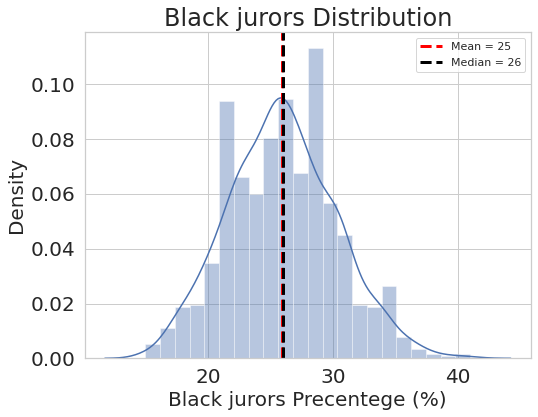

In [ ]:
# 3: ploting the distribiution:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.distplot(x=df['black_jurors_n'], kde = True)
plt.axvline(x=df['black_jurors_n'].mean(), color='red',ls='--',lw=3,label = f"Mean = {int(df['black_jurors_n'].mean())}")
plt.axvline(x=df['black_jurors_n'].median(),color='black',ls='--',lw=3,label = f"Median = {int(df['black_jurors_n'].median())}")
ax.set_xlabel("Black jurors Precentege (%)",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
ax.set_title("Black jurors Distribution",fontsize=24)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(loc='best')

### 1.3 What is the probability of getting a panel with 8 or less black jurors in a random panel?

In [ ]:
print(f"the probability of getting a panel with 8 or less black jurors in a random panel is {(len(df[df['black_jurors_n']<8])/len(df))*100} %")

the probability of getting a panel with 8 or less black jurors in a random panel is 0.0 %


### 1.4 Given your results, what do you think of the Supreme Court's statement about the disparity between the number of blacks in the population and in the panle?

Not only are 8 jurors not within the range of standard deviation but **they are not even in the entire sample** ... 

So based on this analysis we can say that It can at **least be determined that this is an unfortunate mistake**. If not, it is an **attempt to cover inequality with incorrect statistical arguments**.

*** 

## 2. Comparing wine ratings across countries

Wine magazine ranks wines from all over the word on a 100-point scale.   
We would like to see whether some countries make better wines. We will focus on 4 countries: Cyprus, India, Chile, and Israel.  
A dataset of ratings from the magazine is provided in the file 'wine.csv'. The rating is given by the 'points' variable.

### 2.1 Plot the ratings of wines from the 4 countries of interest (Cyprus, India, Chile, and Israel).


> Pick any plot type that you think is most informative and jusitfy your choice.  
> You may pick more than one plot type. If you do, explain why multiple plot types are needed.

In [ ]:
path = "/content/wine.csv"
df_wines = pd.read_csv(path)

Text(0.5, 1.0, 'Rating wines distribution')

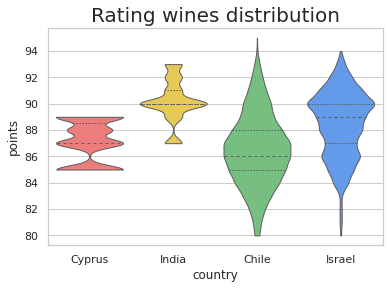

In [ ]:
# groupby the countries column:
# df_wines_countries = df_wines.groupby('country')

# define df for each country :
Cyprus = df_wines[df_wines['country']=="Cyprus"]
India = df_wines[df_wines['country']=="India"]
Chile = df_wines[df_wines['country']=="Chile"]
Israel = df_wines[df_wines['country']=="Israel"]

# Join all to 1 df:
df_wines_countries = pd.concat([Cyprus, India,Chile,Israel])

# create boxplots with name of country and points:
pallette = ["#FF6B6B","#FFD93D","#6BCB77", "#4D96FF"] #Create palette
a = sns.violinplot(data = df_wines_countries,x = 'country', y =df_wines_countries.columns[4], inner="quartile",
                    cut=0, bw=.2, scale='width', linewidth=1,palette =pallette)
a.set_title("Rating wines distribution", fontsize =20)

### 2.2 What is the median rating of wines from each of the countries of interest?  

| country   |   count |   50% |    mean |     std |
|:----------|:--------:|:------:|:--------:|:--------:|
| Chile     |    4472 |    86 | 86.4935 | 2.69296 |
| Cyprus    |      11 |    87 | 87.1818 | 1.60114 |
| India     |       9 |    90 | 90.2222 | 1.71594 |
| Israel    |     505 |    89 | 88.4713 | 2.47841 |

How to create this table?
using this code 🔽

In [ ]:
# create describe df and print it to markdown:
desc = df_wines_countries.groupby('country')["points"].describe()
desc = desc[["count","50%","mean", "std"]]

from pandas import DataFrame
from tabulate import tabulate

print(tabulate(desc, tablefmt="pipe", headers="keys"))

| country   |   count |   50% |    mean |     std |
|:----------|--------:|------:|--------:|--------:|
| Chile     |    4472 |    86 | 86.4935 | 2.69296 |
| Cyprus    |      11 |    87 | 87.1818 | 1.60114 |
| India     |       9 |    90 | 90.2222 | 1.71594 |
| Israel    |     505 |    89 | 88.4713 | 2.47841 |


while the medians looks close to each other, There is big differences in the amount of samples for each country!

### 2.3 What are the standard errors of these medians? 

We need to do bootstaping to calculate the SE of median:

*** 

In [ ]:
countries = ["Cyprus","India","Chile","Israel"] 
for i in countries:
  sample_size = len(df_wines[df_wines['country']==i]) # the count of samples we have for each country
  boot_straps = 1000  #1000 iretations
  sample_medians = np.zeros(boot_straps)
  for ii in range(boot_straps):
    sample = np.random.choice(df_wines[df_wines['country']==i]['points'], 
                              size=sample_size,
                              replace=True)
    sample_medians[ii]= np.median(sample) # median of each iteration
    # now we can find the standard deviation of the medians
  se_median = sample_medians.std()
  print("The standard error of the median of ", i, f", calculated using bootstrapping is: {se_median:.3f} points")   

The standard error of the median of  Cyprus , calculated using bootstrapping is: 0.834 points
The standard error of the median of  India , calculated using bootstrapping is: 0.556 points
The standard error of the median of  Chile , calculated using bootstrapping is: 0.199 points
The standard error of the median of  Israel , calculated using bootstrapping is: 0.162 points


## 3. Testing for statistical significance in ratings across countries

We want to compare the median ratings of wines from different countries. As our test statistic (MOE), we will use the difference in median ratings between a pair of countries. 

### 3.1 What should be our null hypothesis (H0) when testing for differences in medians across countries?

The $H_0$ is that there is no difference between the medians across countries. 

In other words: **the difference between the medians of 2 groups is zero**.

### 3.2 For each pair of countries, compute the observed test statistic. 

In [ ]:
# Test statistic is the different between the medians:

# 1. All possible pairs Using combinations():
from itertools import combinations

countries = ["Cyprus","India","Chile","Israel"] 
countries_pairs = list(combinations(countries, 2))
print(countries_pairs)

[('Cyprus', 'India'), ('Cyprus', 'Chile'), ('Cyprus', 'Israel'), ('India', 'Chile'), ('India', 'Israel'), ('Chile', 'Israel')]


In [ ]:
# 2. Empty df to fill with test statistic
df_test_stat = pd.DataFrame(columns = ["Pair","Test_stat"])

# 3. Fill the df with values:
for pair in countries_pairs:
  med1 = desc['50%'].loc[pair[0]] #median of country 1
  med2 = desc['50%'].loc[pair[1]] #median of country 2
  test_stat = med1-med2 # difference is the test statistic
  new_row = {'Pair':pair, 'Test_stat':test_stat}
  #append row to the dataframe:
  df_test_stat = df_test_stat.append(new_row, ignore_index=True)
df_test_stat = df_test_stat.set_index("Pair") # set the pair column to be index
df_test_stat

,Test_stat
Pair,
"(Cyprus, India)",-3.0
"(Cyprus, Chile)",1.0
"(Cyprus, Israel)",-2.0
"(India, Chile)",4.0
"(India, Israel)",1.0
"(Chile, Israel)",-3.0


### 3.3 For each pair of countries, use a permutation test with 1000 permutations to compute a p-value. 

In [ ]:
# function for permutation test :


def permutation(
                df1,
                df2,
                MOE,
                var = 'points',
                runs = 1000
                ):

    """ perform a permutation test on the given dataframes """

    # Pool variables into a single distribution :

    pooled = np.concatenate(
                            (
                            df1[ var ].values,
                            df2[ var ].values
                            )
                            )


    # Construct a simulated sampling distribution :

    sample_size_1 = len( df1 )
    sample_size_2 = len( df2 )


    diffs = np.zeros( runs )

    for i in range(runs):

        np.random.shuffle( pooled )
        sample_1 = pooled[ : sample_size_1 ]
        sample_2 = pooled[ -sample_size_2 : ]
        diffs[ i ] = np.abs( np.median(sample_1) - np.median(sample_2) )
    


    # compute our p-value :

    larger = np.where( diffs >= MOE, 1, 0)

    p_val = np.sum( larger ) / runs

    return p_val

In [ ]:
# Convert string to df with dictionary
convert_dict = {"Cyprus":Cyprus,"India":India,"Chile":Chile,"Israel":Israel}

In [ ]:
for i in countries_pairs:
    points1 = convert_dict[i[0]] # values of points country 1
    points2 = convert_dict[i[1]] # values of points country 2
    # absulute median:
    val1 = convert_dict[i[0]]["points"] # values of points country 1
    val2 = convert_dict[i[1]]["points"] # values of points country 2
    stat_diff = np.abs(val1.median()-val2.median()) # median difference between the countries
    MOE = stat_diff
    pv = permutation( df1 = points1, 
                               df2 = points2,  
                               MOE = MOE
                             )
    print(f"P value of {i} is {pv}" )

P value of ('Cyprus', 'India') is 0.055
P value of ('Cyprus', 'Chile') is 0.591
P value of ('Cyprus', 'Israel') is 0.143
P value of ('India', 'Chile') is 0.004
P value of ('India', 'Israel') is 0.689
P value of ('Chile', 'Israel') is 0.0


### 3.4 Are the p-values you computed one-sided or two sided?  
If your answer is one-sided, how would you change you computation to obtain two-sided p-values?   
If your answer is two-sided, how would you change you computation to obtain one-sided p-values? 

###My answer is 2 sided. In order to calculate 1 side i has to calculate the **non absolute value of the median difference**.

### 3.5 How do you interpret the p-value you got for the compariosn chile-Israel and for the comparion India-Cyprus?

###My p-value for Israel-Chile is 0.
My interpertation is that I must reject the null hypothesis, and that the median score of Israel is significantly larger than the median score of Chile.
 chile's dataframe is about 9 times larger, and that might be the reason to the p-value we got.

The question we need to ask is if the MOE we got is interesting, or it's too small (difference of 3 points - Chile-86, Israel-89).

By looking at the plot we see Chile's distribution is larger than Israel's distribution, and Chile's highest-rated wines have higher rating than Israel's highest-rated wines, but Chile also have much more low-rated wines than Israel.

Maybe the difference in medians is not the best estimate for the question 'whether some countries make better wines', and we should also take in count the distributions of the countries, or to compare between the best wines of each country, or maybe to add the 'price' variable to the comparison.

###My p-value for India - Cyprus is 0.055.

 so if I choose a thershold of 95%, I can say that the Null Hypothesis explains the differences, the medians are the same and the differences observed could have happend by chance.

### 3.6 These two p-values should be quite different from each other (if they aren't, double-check your previous answers). Why might they be so different?

As i showed before there is big different in the sample size. The sample size of Chile is very large, around 4000 points, while the sample size of India and Cyprus are both around 10 points. With small sample sizes, one can get larger p-values.